# <span style="color:blue"> IBM Data Science Experience Notebook </span>
<div style="text-align: center"><img width=1000px src="https://ibm.box.com/shared/static/ldpdfd4umja9f7rm5evyk30hmxltnf2t.jpg"></div>
<BR>



# Share the Insight

There are two main insights we want to communicate. 
- Bangalore is the largest market for Onion Arrivals. 
- Onion Price variation has increased in the recent years.

Let us explore how we can communicate these insight visually.

## Preprocessing to get the data

In [1]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [2]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# The code was removed by DSX for sharing.

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [5]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [6]:
# Get the data for year 2015
df2015 = df[df.year == 2015]

In [7]:
# Groupby on City to get the sum of quantity
df2015City = df2015.groupby(['city'], as_index=False)['quantity'].sum()

In [8]:
df2015City = df2015City.sort_values(by = "quantity", ascending = False)

In [9]:
df2015City.head()

,city,quantity
9,BANGALORE,8267060
66,MAHUVA,5113510
100,SOLAPUR,4162041
83,PUNE,3591209
62,LASALGAON,3581359


## Let us plot the Cities in a Geographic Map

In [11]:
# Load the geocode file
dfGeo = pd.read_csv(get_object_storage_file_with_credentials_fa82361a54ac4ec7a8babf034b89ae80('FormationDSX', 'city_geocode.csv'))
dfGeo.head()

,city,lon,lat
0,GUWAHATI,91.736237,26.144517
1,KOLKATA,88.363895,22.572646
2,SRIRAMPUR,88.338505,23.403339
3,SHEROAPHULY,88.321501,22.769003
4,BURDWAN,87.861479,23.232421


In [12]:
dfGeo.head()

,city,lon,lat
0,GUWAHATI,91.736237,26.144517
1,KOLKATA,88.363895,22.572646
2,SRIRAMPUR,88.338505,23.403339
3,SHEROAPHULY,88.321501,22.769003
4,BURDWAN,87.861479,23.232421


### PRINCIPLE: Joining two data frames

There will be many cases in which your data is in two different dataframe and you would like to merge them in to one dataframe. Let us look at one example of this - which is called left join

![](img/left_merge.png)

In [13]:
dfCityGeo = pd.merge(df2015City, dfGeo, how='left', on=['city', 'city'])

In [14]:
dfCityGeo.head()

,city,quantity,lon,lat
0,BANGALORE,8267060,77.594563,12.971599
1,MAHUVA,5113510,71.756317,21.090219
2,SOLAPUR,4162041,75.906391,17.659919
3,PUNE,3591209,73.856744,18.520430
4,LASALGAON,3581359,74.232606,20.149142


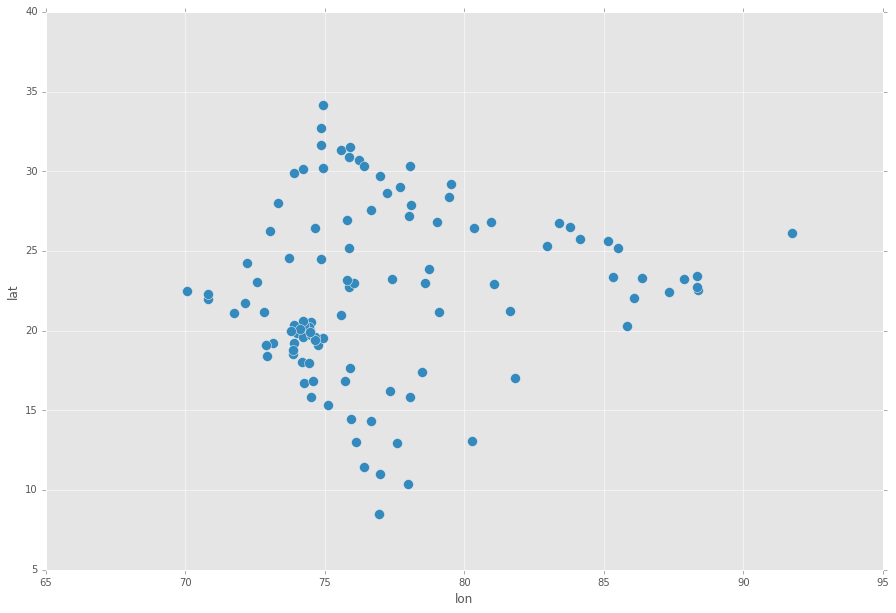

In [15]:
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = 100)

We can do a crude aspect ratio adjustment to make the cartesian coordinate systesm appear like a mercator map

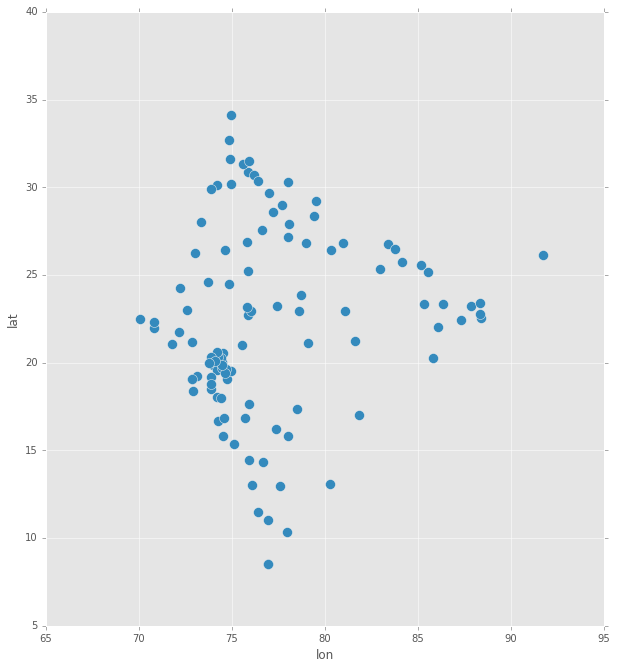

In [16]:
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = 100, figsize = [10,11])

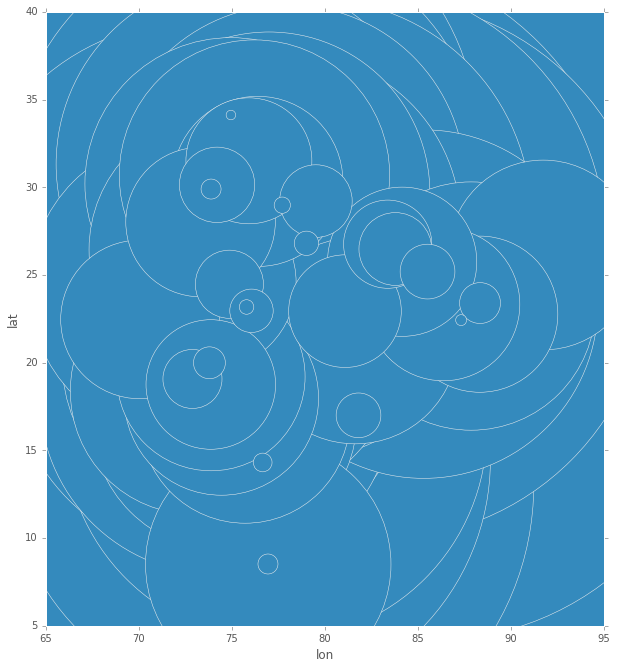

In [17]:
# Let us at quanitity as the size of the bubble
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity, figsize = [10,11])

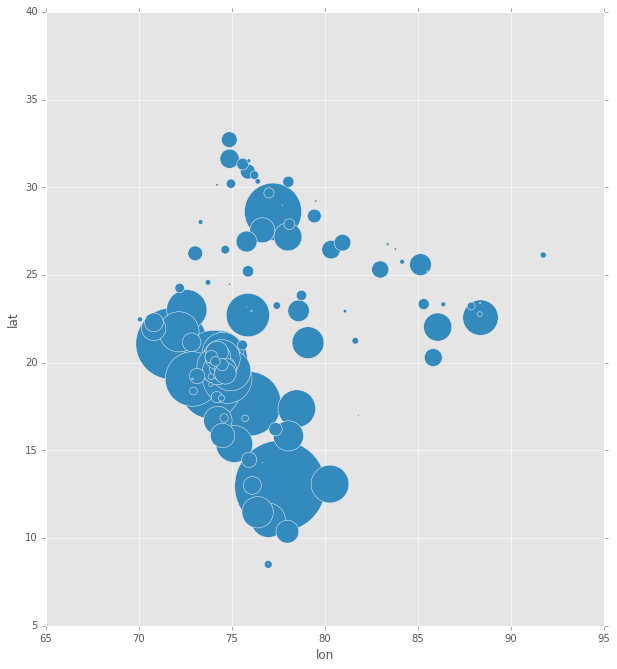

In [18]:
# Let us scale down the quantity variable
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity/1000, figsize = [10,11])

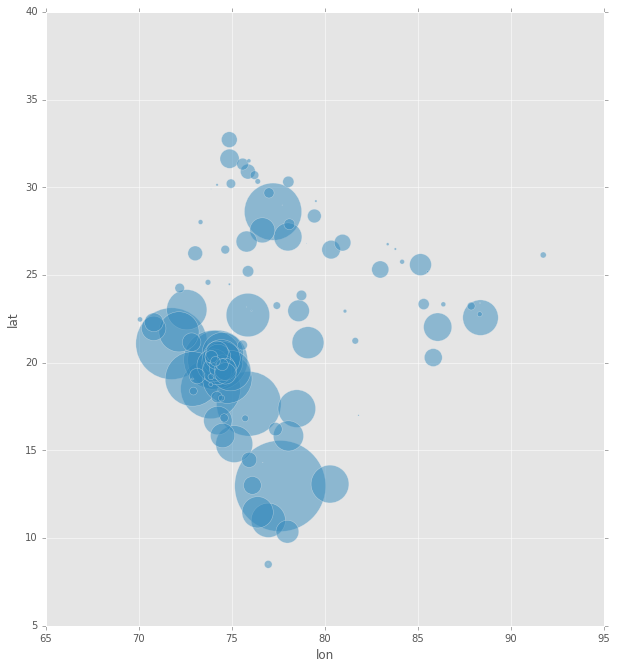

In [19]:
# Reduce the opacity of the color, so that we can see overlapping values
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity/1000, alpha = 0.5, figsize = [10,11])